11490434/11490434 [==============================] - 0s 0us/step
(60000, 784)
(10000, 784)
Epoch 1/50
235/235 [==============================] - 7s 23ms/step - loss: 0.2775 - val_loss: 0.1909
Epoch 2/50
235/235 [==============================] - 6s 27ms/step - loss: 0.1723 - val_loss: 0.1545
Epoch 3/50
235/235 [==============================] - 5s 23ms/step - loss: 0.1448 - val_loss: 0.1344
Epoch 4/50
235/235 [==============================] - 5s 22ms/step - loss: 0.1288 - val_loss: 0.1216
Epoch 5/50
235/235 [==============================] - 4s 18ms/step - loss: 0.1184 - val_loss: 0.1131
Epoch 6/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1113 - val_loss: 0.1072
Epoch 7/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1063 - val_loss: 0.1030
Epoch 8/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1026 - val_loss: 0.1000
Epoch 9/50
235/235 [==============================] - 4s 16ms/step - loss: 0.0998 - val_loss: 0.0974


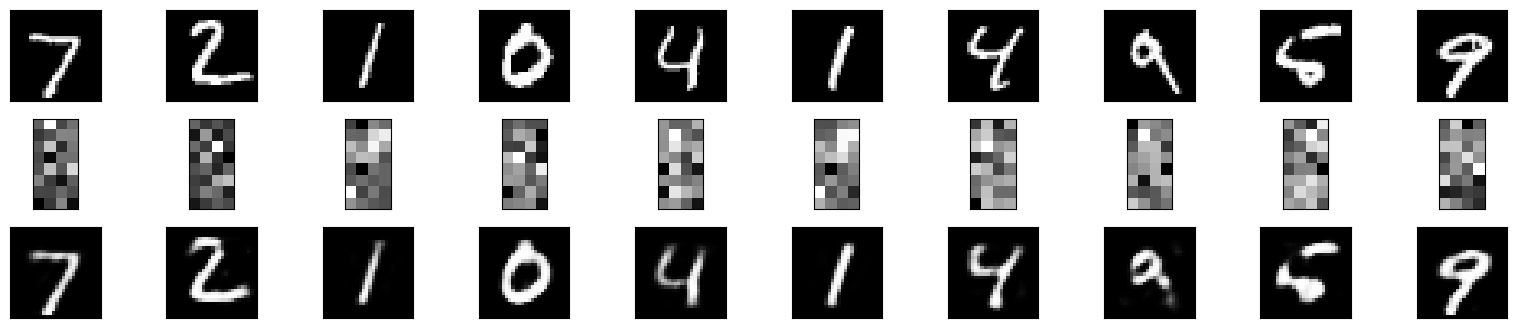

In [1]:
import keras
from keras import layers
from keras.datasets import mnist
import numpy as np
encoding_dim=32

input_img=keras.Input(shape=(784,))

encoded=layers.Dense(encoding_dim, activation='relu')(input_img)

decoded=layers.Dense(784, activation='sigmoid')(encoded)

autoencoder=keras.Model(input_img,decoded)

encoder=keras.Model(input_img,encoded)
encoded_input=keras.Input(shape=(encoding_dim,))

decoder_layer=autoencoder.layers[-1]

decoder=keras.Model(encoded_input,decoder_layer(encoded_input))
autoencoder.compile(optimizer='adam',loss='binary_crossentropy')

(X_train,_),(X_test,_)=mnist.load_data()
X_train=X_train.astype('float32')/255.
X_test=X_test.astype('float32')/255.
X_train=X_train.reshape((len(X_train),np.prod(X_train.shape[1:])))
X_test=X_test.reshape((len(X_test),np.prod(X_test.shape[1:])))
print(X_train.shape)
print(X_test.shape)

autoencoder.fit(X_train,X_train,
 epochs=50,
 batch_size=256,
 shuffle=True,
 validation_data=(X_test,X_test))
encoded_imgs=encoder.predict(X_test)
decoded_imgs=decoder.predict(encoded_imgs)
import matplotlib.pyplot as plt
n = 10
plt.figure(figsize=(40, 4))
for i in range(10):

 ax = plt.subplot(3, 20, i + 1)
 plt.imshow(X_test[i].reshape(28, 28))
 plt.gray()
 ax.get_xaxis().set_visible(False)
 ax.get_yaxis().set_visible(False)

 ax = plt.subplot(3, 20, i + 1 + 20)
 plt.imshow(encoded_imgs[i].reshape(8,4))
 plt.gray()
 ax.get_xaxis().set_visible(False)
 ax.get_yaxis().set_visible(False)

 ax = plt.subplot(3, 20, 2*20 +i+ 1)
 plt.imshow(decoded_imgs[i].reshape(28, 28))
 plt.gray()
 ax.get_xaxis().set_visible(False)
 ax.get_yaxis().set_visible(False)
plt.show()